In [1]:
from models import DeterministicCompartmentalModel, SingleInterventionScenario, CampParams

In [2]:
camp_params = CampParams.load_from_json("/Users/billyzhaoyh/Desktop/AIforGoodSimulator/epi-models/models/config/sample_input.json")

In [3]:
model = DeterministicCompartmentalModel(camp_params)

In [4]:
assert model.infection_matrix.shape == (8, 8)

In [5]:
better_hygiene = SingleInterventionScenario(start_times=[0], end_times=[180], infection_matrix=model.infection_matrix, transmission_reduction_factor_inter=0.7)

In [6]:
results = model.run_model(better_hygiene, r0=2, beta=1/24, latent_rate = 1/6, removal_rate = 1/5, hosp_rate = 1/20, death_rate_ICU = 1/5, death_rate_no_ICU = 1/3, initial_symp=5)

In [7]:
results = results * 20000

<AxesSubplot:>

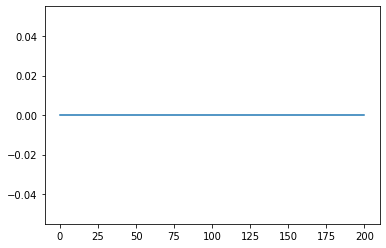

In [8]:
results['No ICU Care'].plot()

<AxesSubplot:>

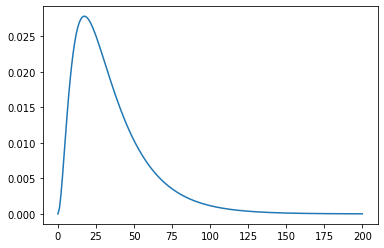

In [9]:
results['Critical'].plot()

<AxesSubplot:>

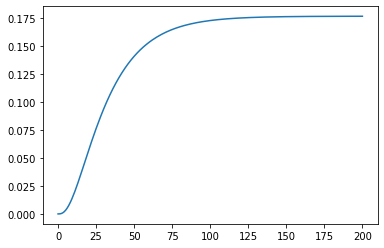

In [10]:
results['Deaths'].plot()

In [11]:
results

,Susceptible: 0-9,Exposed: 0-9,Infected (symptomatic): 0-9,Asymptomatically Infected: 0-9,Recovered: 0-9,Hospitalised: 0-9,Critical: 0-9,Deaths: 0-9,Offsite: 0-9,Quarantined: 0-9,...,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,Offsite,Quarantined,No ICU Care
0,5998.500000,0.000000e+00,1.500000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,...,0.000000e+00,5.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,5998.400257,9.162460e-02,1.231131e+00,4.552594e-03,0.270403,0.002016,1.473419e-05,7.648612e-07,0.0,0.0,...,2.622044e-01,4.103479e+00,1.188965e-02,0.799650,0.107389,0.000785,0.000041,0.0,0.0,0.0
2,5998.317908,1.532146e-01,1.015553e+00,1.510918e-02,0.494582,0.003577,5.089389e-05,5.485265e-06,0.0,0.0,...,4.383837e-01,3.384203e+00,3.945651e-02,1.465386,0.190586,0.002711,0.000292,0.0,0.0,0.0
3,5998.249328,1.927067e-01,8.420495e-01,2.824801e-02,0.682775,0.004778,9.909965e-05,1.663066e-05,0.0,0.0,...,5.512254e-01,2.805003e+00,7.375838e-02,2.026362,0.254563,0.005280,0.000886,0.0,0.0,0.0
4,5998.191719,2.160617e-01,7.018535e-01,4.179013e-02,0.842697,0.005691,1.527961e-04,3.548622e-05,0.0,0.0,...,6.177899e-01,2.336786e+00,1.090991e-01,2.504658,0.303240,0.008141,0.001891,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,5997.766240,-2.324133e-08,3.608731e-08,5.411732e-08,2.230442,0.000003,2.907546e-07,3.314593e-03,0.0,0.0,...,-6.509982e-08,1.124631e-07,1.377770e-07,6.899222,0.000158,0.000015,0.176363,0.0,0.0,0.0
197,5997.766240,-1.626000e-08,2.862159e-08,4.292211e-08,2.230442,0.000003,2.779120e-07,3.314636e-03,0.0,0.0,...,-4.578950e-08,8.903125e-08,1.090833e-07,6.899228,0.000151,0.000015,0.176366,0.0,0.0,0.0
198,5997.766240,-3.656010e-09,1.636732e-08,2.454573e-08,2.230443,0.000003,2.656284e-07,3.314677e-03,0.0,0.0,...,-1.109169e-08,5.059987e-08,6.201644e-08,6.899233,0.000145,0.000014,0.176368,0.0,0.0,0.0
199,5997.766240,4.808223e-09,7.843171e-09,1.176371e-08,2.230443,0.000003,2.538925e-07,3.314716e-03,0.0,0.0,...,1.230175e-08,2.377979e-08,2.917948e-08,6.899238,0.000138,0.000013,0.176370,0.0,0.0,0.0


In [12]:
simulation_results = model.run_single_simulation(better_hygiene, num_iterations=1000)

[########################################] | 100% Completed | 36.9s


In [13]:
sim_groups = simulation_results.groupby('R0')

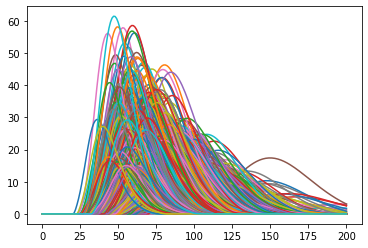

In [14]:
for index,group in sim_groups:
    group = 20000*group
    group['No ICU Care'].plot()

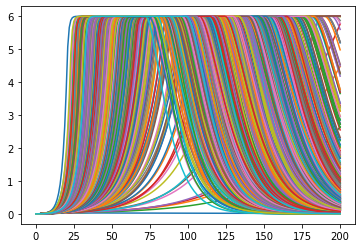

In [15]:
for index,group in sim_groups:
    group = 20000*group
    group['Critical'].plot()

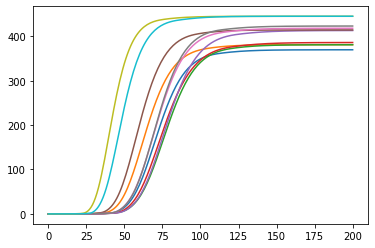

In [14]:
for index,group in sim_groups:
    group = 20000*group
    group['Deaths'].plot()

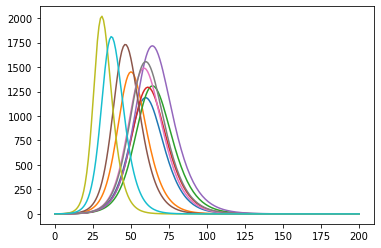

In [22]:
for index,group in sim_groups:
    group = 20000*group
    group['Infected (symptomatic)'].plot()